In [1]:
import numpy as np
import cv2 as cv
import cv2 as cv2
from matplotlib import pyplot as plt

# OpenCV image segmentation example

## background pattern

In [ ]:
# function: record_background
# Record the background
# Input:    frames: number of frames to record
# Output:   mean: mean of the background
#           std: std deviation of the background
def record_background(frames, show):
    cam = cv2.VideoCapture(0)
    
    #Record first frame
    ret, frame = cam.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    shape = np.shape(gray)
    aux = np.zeros((shape[0], shape[1], 1))
    aux[:,:,0] = gray
    video = aux
    
    #Record the rest of the frames
    iteration=1
    while(iteration<frames):
        ret, frame = cam.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        aux[:,:,0] = gray
        video = np.concatenate((video, aux), axis=2)

        if show:
            cv.imshow('frame', frame)
        k = cv.waitKey(30) & 0xff
        if k == 27 | iteration==frames:
            break
        iteration += 1
      
    #cam.release()
    cv.destroyAllWindows()
    mean = np.mean(video, axis=2)
    std = np.std(video, axis=2)
    
    return mean, std

#Example of use
mean, std = record_background(90, True)
plt.figure()
plt.imshow(mean), plt.show()
plt.figure()
plt.imshow(std), plt.show()

In [ ]:
# function substract
# input:     frame: frame in grayscale
#            mean: mean from background
#            std: std deviation from background
# Output:    mask of the detection
def substract(frame, mean, std):
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    std += 1
    gray = frame
    shape = np.shape(frame)
    difference = gray - mean
    difference_squared = np.multiply(difference, difference)
    mask = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            if difference_squared[i,j]>25*std[i,j]:
                mask[i,j] = 255
    
    return mask

In [ ]:
#Test the system with 1 frame
mean, std = record_background(10, True)
cam = cv2.VideoCapture(0)
input()
ret, frame = cam.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

output = substract(gray, mean, std)
print(output)
plt.figure()
plt.imshow(output), plt.show()

cam.release()

In [ ]:
# Test the system in real time
mean, std = record_background(40, True)

cam = cv2.VideoCapture(0)
while(True):
    ret, frame = cam.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    output = substract(frame, mean, std)

    cv.imshow('frame', frame)
    cv.imshow('system output', output)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break

cam.release()
cv.destroyAllWindows()

# Modelo de fondo a color

<Figure size 432x288 with 0 Axes>

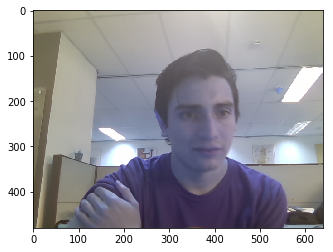

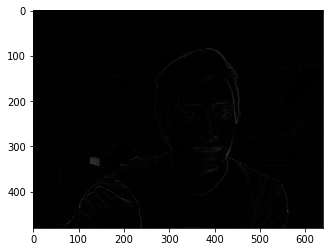

(<matplotlib.image.AxesImage at 0x1f163c40588>, None)

In [2]:
# function: record_background
# Record the background
# Input:    frames: number of frames to record
# Output:   mean: mean of the background
#           std: std deviation of the background
def record_background_color(frames, show):
    cam = cv2.VideoCapture(0)
    
    #Record first frame
    ret, frame = cam.read()
    shape = np.shape(frame)
    aux = np.zeros((shape[0], shape[1], shape[2], 1))
    aux[:,:,:,0] = frame
    video = aux
    
    #Record the rest of the frames
    iteration=1
    while(iteration<frames):
        ret, frame = cam.read()
        aux[:,:,:,0] = frame
        video = np.concatenate((video, aux), axis=3)

        if show:
            cv.imshow('frame', frame)
        k = cv.waitKey(30) & 0xff
        if k == 27 | iteration==frames:
            break
        iteration += 1
      
    #cam.release()
    cv.destroyAllWindows()
    mean = np.mean(video, axis=3)
    std = np.std(video, axis=3)
    
    return mean, std

#Example of use
mean, std = record_background_color(10, True)
plt.figure()
plt.imshow(mean.astype(int), plt.show())
plt.figure()
plt.imshow(std.astype(int)), plt.show()

In [3]:
# function substract
# input:     frame: frame in grayscale
#            mean: mean from background
#            std: std deviation from background
# Output:    mask of the detection
def substract_color(frame, mean, std):
    std += 1
    shape = np.shape(frame)
    difference = frame - mean
    difference_squared = np.multiply(difference, difference)
    mask = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                if difference_squared[i,j,k]>35*std[i,j,k]:
                    mask[i,j,k] = 255
    mask2 = np.zeros((shape[0], shape[1]))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if (mask[i,j,0]==255 or mask[i,j,1]==255 or mask[i,j,2]==255):
                mask2[i,j] = 255
    
    return mask2

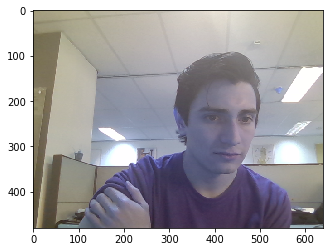

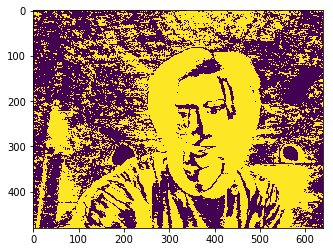

(480, 640)


In [4]:
#Test the system with 1 frame
mean, std = record_background_color(10, True)
input()
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
plt.figure()
plt.imshow(frame), plt.show()
input()
output = substract_color(frame, mean, std)
plt.figure()
plt.imshow(output), plt.show()

cam.release()

print(np.shape(output))

In [6]:
# Test the system in real time
mean, std = record_background_color(40, True)

cam = cv2.VideoCapture(0)
while(True):
    ret, frame = cam.read()
    output = substract_color(frame, mean, std)

    cv.imshow('frame', frame)
    cv.imshow('system output', output)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break

cam.release()
cv.destroyAllWindows()